In [1]:
!pip install intern
from intern.remote.boss import BossRemote
from intern.resource.boss.resource import *

import numpy as np
import configparser
import matplotlib.pyplot as plt
import io

# Setup and connection parameters

connection_params={
    'protocol':'https',
    'host':'api.bossdb.io',
    'token':'public' #allows read access to the general public
}

# Dataset dimensions are z:[0,720], y:[0,1420], x:[0,5805]
# Data beyond these ranges will be padded with 0 values
#BossDB access uses an [inclusive_index,exclusive_index] format, so [0,10] specifies 10 index values 0-9

data_params={
    'prasad_coll':'prasad',
    'prasad_exp' : 'prasad2020',
    'prasad_channel' : 'image',
    'pixel_annotation_channel': 'pixel_annotation',
    'roi_channel': 'region_of_interest',
    'roi_interp_channel': 'roi_interpolated',
    'prasad_coord' : 'prasad_prasad2020',
    'prasad_res' : 0, #Native resolution of dataset is 1.17um, 1.17um, 1.17um per voxel=
}
rmt = BossRemote(connection_params)
#annotations
chan_pixel = ChannelResource(data_params['pixel_annotation_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint64', sources=data_params['prasad_channel'])
#raw data
chan_raw = ChannelResource(data_params['prasad_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint8', sources=data_params['prasad_channel'])


     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 92kB 5.1MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 860kB 7.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 143kB 16.9MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 921kB 14.0MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 245kB 20.4MB/s 
  Created wheel for blosc: filename=blosc-1.10.1-cp36-cp36m-linux_x86_64.whl size=2634572 sha256=ee100414e2c41f29cc4871124847bb0a5cee5f0d5ceacfb9b33da4aefa295d22
  Stored in directory: /root/.cache/pip/wheels/82/af/4d/774312f0af02af6a332f8e19dbe02dbabe3602eab05c9a2a05
Successf

In [2]:
from scipy import misc

In [21]:
#You can find more information about the data here: https://www.biorxiv.org/content/10.1101/2020.05.22.111617v1.abstract
#You can find code examples here: https://bossdb.org/project/prasad2020 and https://github.com/nerdslab/xray-thc
#Region 1: Cortex

#Full coordinates of Manual coritical annotations
xrange=[4600,4857]
yrange=[900,1157]
zrange=[110,471]

#Get the Annotation from bossDB
raw_cutout = rmt.get_cutout(chan_raw, data_params['prasad_res'], xrange,
                                 yrange, zrange)
raw_cutout = np.transpose(raw_cutout,(2,1,0))
anno_cutout = rmt.get_cutout(chan_pixel, data_params['prasad_res'], xrange,
                                 yrange, zrange)
anno_cutout = np.transpose(anno_cutout,(2,1,0))
z_vals = [30,60,90,120,150,180,210,240,270,300,330]
# zero indexed Z slices equal to multiples of 30 are valid, [30,60,90,120,150,180,210,240,270,300,330]
print(anno_cutout.shape) #Data are Z,Y,X
print(np.max(anno_cutout))
print(np.min(anno_cutout))

(257, 257, 361)
2
0


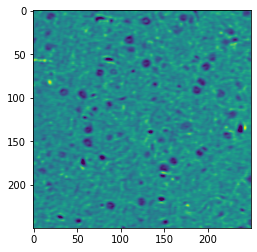

In [31]:
# Note: Pixel level annotations are present at the following slices:
#z = [30,60,90,120,150,180,210,240,270,300,330] 

#Pixel-level annotations:
#0 = Backgroud (Tissue)
#1 = Blood Vessel
#2 = Cell
#3 = Myelinated axon (white matter)

# Divide the data into training, test (don't change this!)
x_train = raw_cutout[0:250,0:250,z_vals[0:9]]
x_test = raw_cutout[0:250,0:250,z_vals[9:11]]
y_train = anno_cutout[0:250,0:250,z_vals[0:9]]
#Cell bodies are indicated with the annotation 2, convert this so y_train=1 is a cell and y_train=0 is not a cell
y_train[y_train>2]=0
y_train[y_train<2]=0
y_train[y_train==2]=1

#Cell bodies are indicated with the annotation 2, convert this so y_test=1 is a cell and y_test=0 is not a cell
y_test = anno_cutout[0:250,0:250,z_vals[9:11]]
y_test[y_test>2]=0
y_test[y_test<2]=0
y_test[y_test==2]=1
#display images
plt.imshow(np.squeeze(x_train[:,:,1]))

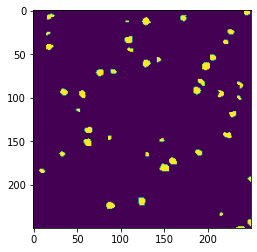

In [33]:
#show labels
plt.imshow(np.squeeze(y_train[:,:,1]))

In [34]:
#a bad threshold detector for cells- we can do better!
def bad_detector(x_data, parameters):
  y_hat = (x_data<parameters['threshold']).astype(int)
  return y_hat

#compute the f1 metric to tell how good something is
def f1_score(y_true,y_hat,threshold=0.5):
  y_true[y_true>threshold] = 1
  y_true[y_true<threshold] = 0
  y_hat[y_hat>threshold] = 1
  y_hat[y_hat<threshold] = 0
  
  #https://en.wikipedia.org/wiki/F1_score
  y_and = np.add(y_true,y_hat)
  true_detections = len(np.where(y_and>1)[0])#add the two numbers together, if both are true it will be 2
  detect_positives = len(np.where(y_hat>0)[0]) #positive numbers indicate detections
  true_positives = len(np.where(y_true>0)[0]) #posiive numbers indicate true cells
  precision = true_detections/detect_positives
  recall = true_detections/true_positives
  f1 = 2*precision*recall/(precision+recall)
  return f1

f1 score for bad detector is 0.1889895347814616. Try to do better!


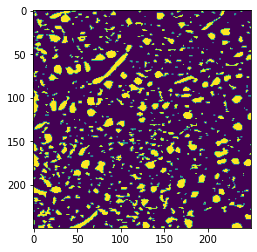

In [40]:
#This is the bad baseline you need to beat!
parameters = {"threshold":105}
y_hat = bad_detector(x_test,parameters)
plt.imshow(np.squeeze(y_hat[:,:,1]))
f1 = f1_score(y_test,y_hat)

print(f'f1 score for bad detector is {f1}. Try to do better!')

In [ ]:
#YOUR CODE HERE
#Print shape of xtrain, ytrain, xtest, ytest
print(x_train.shape)
#Find maximum and minumum values of xtrain, ytrain, xtest, ytest
print(np.min(x_train))

(250, 250, 100)
0


In [ ]:
#YOUR CODE HERE
#Select or train parameters for your classifier using only xtrain, ytrain

In [ ]:
#YOUR CODE HERE
#run your parameters for your classifier to produce y_hat using only your parameters and x_test

In [ ]:
#YOUR CODE HERE
#use the f1_score function using your y_hat and y_test
#print f1 score

In [ ]:
#YOUR CODE HERE
#Plot an example of your y_hat and y_test